<a href="https://colab.research.google.com/github/rohitmaggu/face_detection/blob/master/face_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [2]:
ls


drive/  sample_data/


In [0]:
%load_ext autoreload
%autoreload 2

In [4]:
!git clone https://github.com/rohitmaggu/face_detection


Cloning into 'face_detection'...
remote: Enumerating objects: 6, done.
remote: Counting objects: 100% (6/6), done.
remote: Compressing objects: 100% (4/4), done.
remote: Total 6 (delta 0), reused 6 (delta 0), pack-reused 0
Unpacking objects: 100% (6/6), done.


In [5]:
cd face_detection/


/content/face_detection


In [6]:
import os
os.environ['CUDA_VISIBLE_DEVICES']='0,1'
import numpy as np
from PIL import Image,ImageDraw
import os
import cv2
import time
from face_detector import FaceDetector

In [7]:
cd ..

/content


In [8]:
## Providing path for pretrained model of facebox
MODEL_PATH = './drive/My Drive/faceboxes/model.pb'
face_detector = FaceDetector(MODEL_PATH, gpu_memory_fraction=0.75, visible_device_list='0')
## Gpu memory can be adjusted by using gpu_memory_fraction parameters

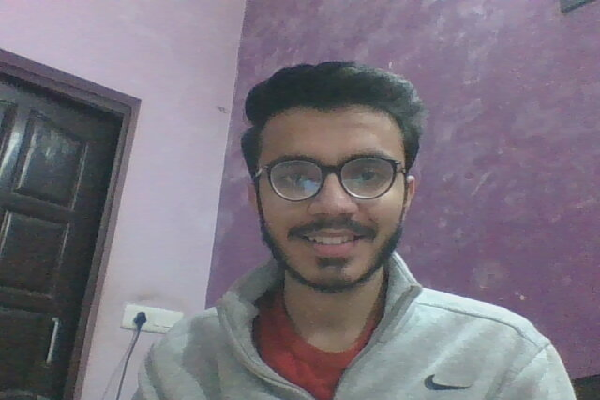

In [9]:
### Checking simply on a custom image 
### printing just image after resizing and transformation
path='./drive/My Drive/images/check1.jpg'
required_size=(600,400)
image_array=cv2.imread(path)
image_array=cv2.cvtColor(image_array,cv2.COLOR_BGR2RGB)
image=Image.fromarray(image_array)
image=image.resize(required_size)
image

In [0]:
## Darawing boxes around the face present in the image
## Confidence score indicates how sure model is in recosgnising faces
def draw_boxes_on_image(image,boxes,scores):
  image_copy=image.copy()
  draw=ImageDraw.Draw(image_copy,'RGBA')
  width,height=image.size

  for b,s in zip(boxes,scores):
    ymin,xmin,ymax,xmax=b
    fill=(255,0,0,45)
    outline='red'
    draw.rectangle(
        [(xmin,ymin),(xmax,ymax)],
        fill=fill,outline=outline
    )
    draw.text((xmin,ymin),text='{:.3f}'.format(s))
  
  return image_copy.resize(required_size)

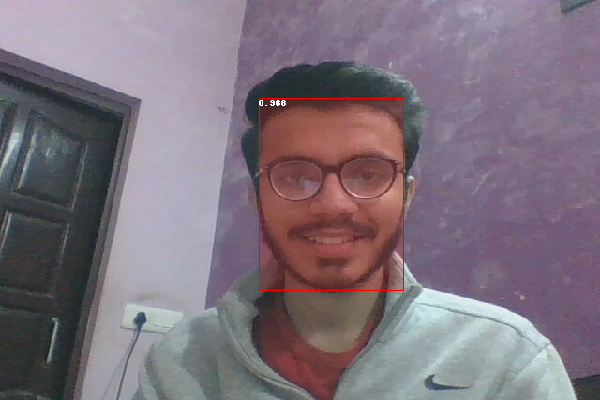

In [26]:
### drawing a rectangle around my face .....
boxes,scores=face_detector(image_array,score_threshold=0.3)
draw_boxes_on_image(Image.fromarray(image_array),boxes,scores)